In [23]:
import scipy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
walkability = "~/shared_data_read_only/Walkability.csv"
meansoft = "~/meansoft.xlsx"
df = pd.read_csv(walkability)
df2 = pd.read_excel(meansoft)

In [3]:
df

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CBSA,CBSA_Name,NatWalkInd
0,48,113,7825,4,19100.0,"Dallas-Fort Worth-Arlington, TX",14.000000
1,48,113,7825,2,19100.0,"Dallas-Fort Worth-Arlington, TX",10.833333
2,48,113,7825,3,19100.0,"Dallas-Fort Worth-Arlington, TX",8.333333
3,48,113,7824,1,19100.0,"Dallas-Fort Worth-Arlington, TX",15.666667
4,48,113,7824,2,19100.0,"Dallas-Fort Worth-Arlington, TX",10.166667
...,...,...,...,...,...,...,...
220735,78,30,961000,2,NaN,NaN,7.333333
220736,78,30,961000,3,NaN,NaN,7.333333
220737,78,30,961000,5,NaN,NaN,7.333333
220738,78,30,960700,3,NaN,NaN,4.000000


In [4]:
columns_to_drop = ['COUNTYFP', 'BLKGRPCE', 'CBSA', 'CBSA_Name'] # Replace with the column names you want to drop from dataset
df_cleaned = df.drop(columns_to_drop, axis=1)

In [5]:
df_cleaned

,STATEFP,TRACTCE,NatWalkInd
0,48,7825,14.000000
1,48,7825,10.833333
2,48,7825,8.333333
3,48,7824,15.666667
4,48,7824,10.166667
...,...,...,...
220735,78,961000,7.333333
220736,78,961000,7.333333
220737,78,961000,7.333333
220738,78,960700,4.000000


In [6]:
df_cleaned = df_cleaned.replace(0, pd.NA)  # Replace zeroes with pandas' NA
df_cleaned = df_cleaned.dropna(how='any')  # Drop rows containing any NA value

In [7]:
df_cleaned

,STATEFP,TRACTCE,NatWalkInd
0,48,7825,14.000000
1,48,7825,10.833333
2,48,7825,8.333333
3,48,7824,15.666667
4,48,7824,10.166667
...,...,...,...
220735,78,961000,7.333333
220736,78,961000,7.333333
220737,78,961000,7.333333
220738,78,960700,4.000000


In [8]:
df_cleaned = df_cleaned.drop_duplicates()

In [9]:
# Remove rows with missing values
df_cleaned = df_cleaned.dropna()

# Fill missing values with mean/median/mode
mean_values = df_cleaned.mean()
wdf_cleaned = df_cleaned.fillna(mean_values)

In [10]:
df_cleaned.columns = df_cleaned.columns.str.lower().str.replace(' ', '_')

In [11]:
state = 'statefp'  # Replace with the name of the column you want to filter
df_filtered = df_cleaned[df_cleaned[state] == 11]

In [12]:
df_filtered

,statefp,tractce,natwalkind
61343,11,4002,17.166667
61344,11,4100,17.833333
61345,11,4202,17.500000
61346,11,5301,15.666667
61347,11,5002,13.166667
...,...,...,...
61787,11,600,17.166667
61788,11,702,12.333333
61789,11,701,12.000000
61791,11,5500,16.333333


In [13]:
issue = 'tractce' # Replace with the name of the column you are sorting
df_sorted = df_filtered.sort_values(by=issue, ascending=True)

In [14]:
df_sorted["natwalkind"].median() #Above Average Walkable is 14.5

14.5

In [15]:
df2

,geoid,name,B08006001,"B08006001, Error",B08006002,"B08006002, Error",B08006003,"B08006003, Error",B08006004,"B08006004, Error",...,B08006047,"B08006047, Error",B08006048,"B08006048, Error",B08006049,"B08006049, Error",B08006050,"B08006050, Error",B08006051,"B08006051, Error"
0,01000US,United States,155284960,164172,127065110,176382,113724270,124490,13340838,63721,...,26086,1543,211753,3524,1788115,11419,868255,9595,7674062,24216
1,04000US11,District of Columbia,371014,2683,131329,3031,113998,2798,17331,1023,...,28,48,5033,465,21688,1172,4576,737,39971,2061
2,61000US11007,"Ward 7, DC",30808,1588,16819,1096,14604,1105,2215,392,...,0,33,49,38,97,64,615,451,2396,554


In [18]:
df2


,Means of Transportation,District of Columbia,United States,"Ward 7, DC"
0,"Car, truck, or van:",131329,127065110,16819
1,Drove alone,113998,113724270,14604
2,Carpooled,17331,13340838,2215
3,Walked,41960,3849557,209


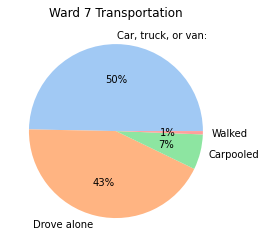

In [28]:
x = df2["Means of Transportation"]
y = df2["District of Columbia"]
z = df2["United States"]
h = df2["Ward 7, DC"]


data = h
labels = x

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.title("Ward 7 Transportation")
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

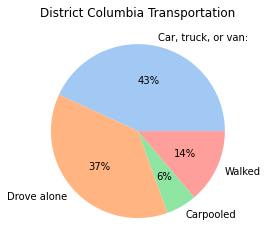

In [27]:
data = y
labels = x

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.title("District Columbia Transportation")
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()